In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
tickers = ["GC=F", "DX-Y.NYB", "^TNX", "BZ=F", "TRY=X"]
data = yf.download(tickers, start="2020-01-01", end="2025-10-28")["Close"]

/tmp/ipython-input-4001407787.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2025-10-28")["Close"]
[*********************100%***********************]  5 of 5 completed


In [ ]:
df = data.copy()
df.head()

Ticker,BZ=F,DX-Y.NYB,GC=F,TRY=X,^TNX
Date,,,,,
2020-01-01,NaN,NaN,NaN,5.94780,NaN
2020-01-02,66.250000,96.849998,1524.500000,5.94630,1.882
2020-01-03,68.599998,96.839996,1549.199951,5.95570,1.788
2020-01-06,68.910004,96.669998,1566.199951,5.96796,1.811
2020-01-07,68.269997,96.980003,1571.800049,5.96900,1.827


In [ ]:
df.columns = ["Gold", "DXY", "US10Y", "Brent", "USDTRY"]

In [ ]:
df.tail()

,Gold,DXY,US10Y,Brent,USDTRY
Date,,,,,
2025-10-21,61.320000,98.930000,4087.699951,41.928902,3.963
2025-10-22,62.590000,98.900002,4044.399902,41.968201,3.953
2025-10-23,65.989998,98.940002,4125.500000,41.976398,3.991
2025-10-24,65.940002,98.949997,4118.399902,42.031101,3.997
2025-10-27,65.620003,98.779999,4001.899902,41.992161,3.997


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1517 entries, 2020-01-01 to 2025-10-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    1466 non-null   float64
 1   DXY     1465 non-null   float64
 2   US10Y   1465 non-null   float64
 3   Brent   1516 non-null   float64
 4   USDTRY  1463 non-null   float64
dtypes: float64(5)
memory usage: 71.1 KB


In [ ]:
df = data.fillna(method="ffill")

/tmp/ipython-input-2669503440.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = data.fillna(method="ffill")


In [ ]:
df=df.fillna(method="bfill")

/tmp/ipython-input-1825099291.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="bfill")


In [ ]:
df.head()

Ticker,BZ=F,DX-Y.NYB,GC=F,TRY=X,^TNX
Date,,,,,
2020-01-01,66.250000,96.849998,1524.500000,5.94780,1.882
2020-01-02,66.250000,96.849998,1524.500000,5.94630,1.882
2020-01-03,68.599998,96.839996,1549.199951,5.95570,1.788
2020-01-06,68.910004,96.669998,1566.199951,5.96796,1.811
2020-01-07,68.269997,96.980003,1571.800049,5.96900,1.827


In [ ]:
df.describe()

Ticker,BZ=F,DX-Y.NYB,GC=F,TRY=X,^TNX
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,74.199011,100.151635,2128.223992,20.763686,2.918111
std,18.942592,5.556859,544.515143,11.753475,1.414508
min,19.330000,89.440002,1477.300049,5.855100,0.499000
25%,65.989998,95.989998,1792.699951,8.432900,1.524000
50%,75.889999,101.010002,1911.300049,18.616671,3.517000
75%,84.779999,104.279999,2329.800049,32.333302,4.217000
max,127.980003,114.110001,4336.399902,42.031101,4.988000


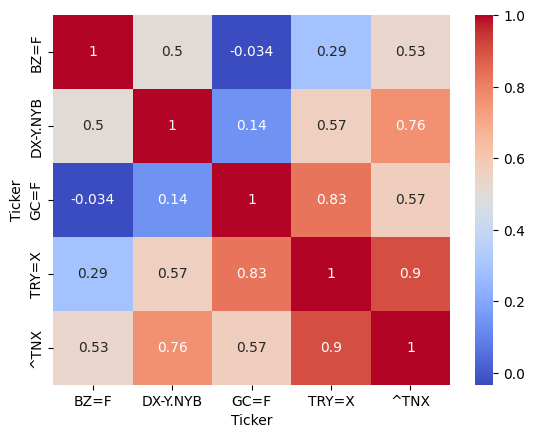

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
df.columns = ["Gold", "DXY", "US10Y", "Brent", "USDTRY"]

In [ ]:
X = df[["DXY", "US10Y", "Brent", "USDTRY"]]
y = df["Gold"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1213, number of used features: 4
[LightGBM] [Info] Start training from score 74.189909


In [ ]:
models.head(15)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,1.93,0.56
BaggingRegressor,0.98,0.98,2.35,0.11
RandomForestRegressor,0.98,0.98,2.39,1.54
LGBMRegressor,0.98,0.98,2.52,0.26
KNeighborsRegressor,0.98,0.98,2.58,0.07
HistGradientBoostingRegressor,0.98,0.98,2.59,0.56
XGBRegressor,0.98,0.98,2.69,3.32
ExtraTreeRegressor,0.98,0.98,2.83,0.04
GradientBoostingRegressor,0.97,0.97,3.24,0.74


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=200, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
     "n_estimators": [100, 200, 300],
     "max_depth": [None, 10, 20, 30],
     "min_samples_split": [2, 5, 10],
}

In [ ]:
grid = GridSearchCV(model, params, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=ExtraTreesRegressor(n_estimators=200, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
print("En iyi parametreler:", grid.best_params_)
print("En iyi R²:", grid.best_score_)

En iyi parametreler: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
En iyi R²: 0.9822612943301104


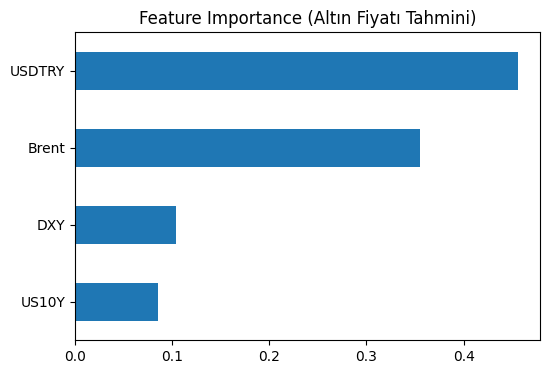

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(6,4))
plt.title("Feature Importance (Altın Fiyatı Tahmini)")
plt.show()

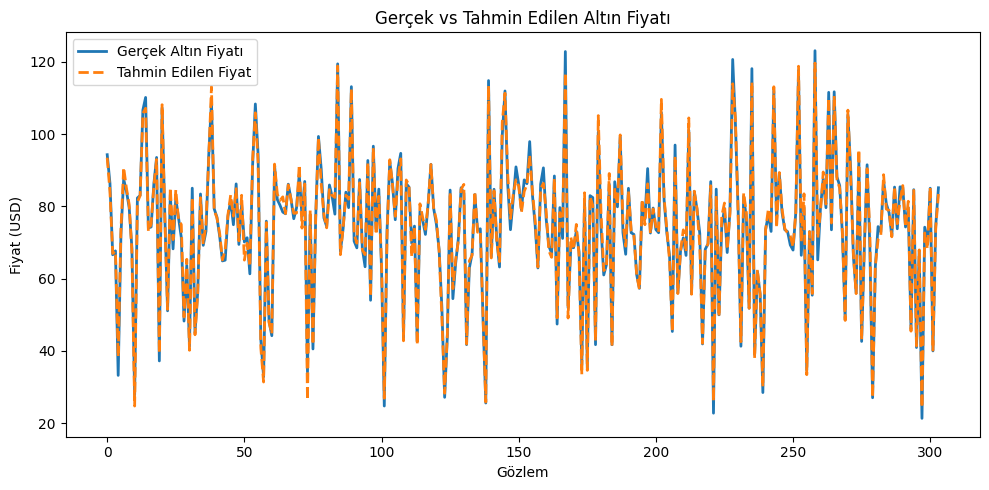

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Gerçek Altın Fiyatı", linewidth=2)
plt.plot(y_pred, label="Tahmin Edilen Fiyat", linestyle="--", linewidth=2)
plt.title("Gerçek vs Tahmin Edilen Altın Fiyatı", fontsize=12)
plt.xlabel("Gözlem")
plt.ylabel("Fiyat (USD)")
plt.tight_layout()
plt.legend()
plt.show()

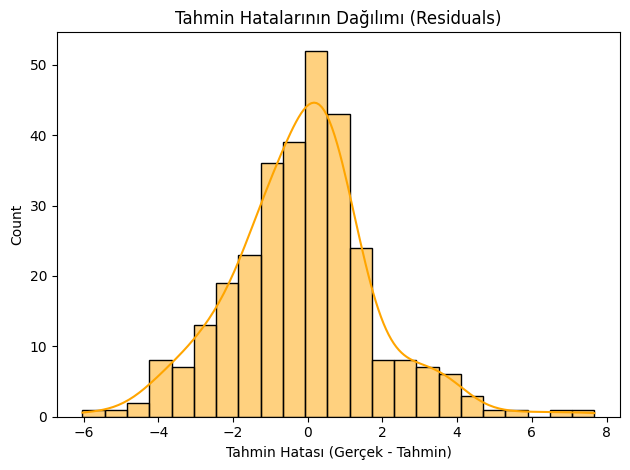

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color="orange")
plt.title("Tahmin Hatalarının Dağılımı (Residuals)")
plt.xlabel("Tahmin Hatası (Gerçek - Tahmin)")
plt.tight_layout()
plt.show()

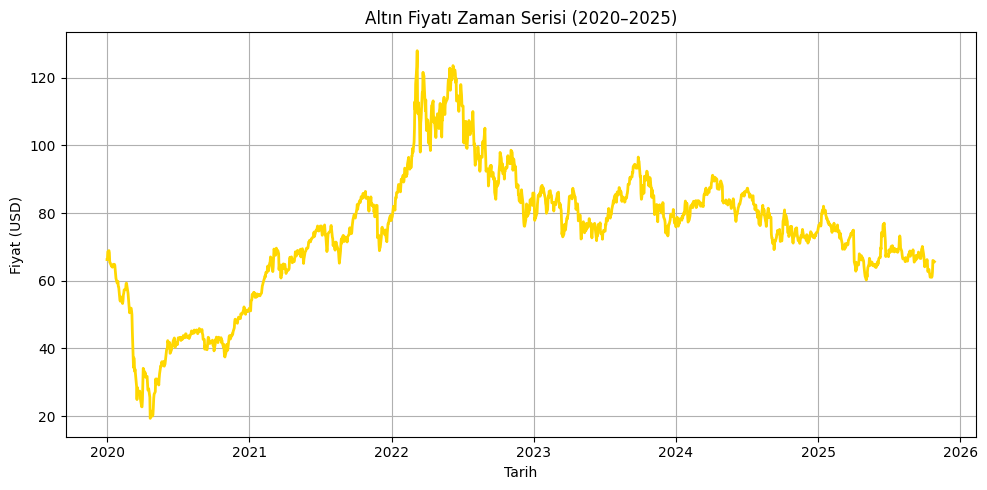

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df["Gold"], color="gold", linewidth=2)
plt.title("Altın Fiyatı Zaman Serisi (2020–2025)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()